# Problem Set 2: Classical Dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sympy as sp

## Part A: Diatomic Molecules
### A1: The Lennard-Jones Potential
#### a)

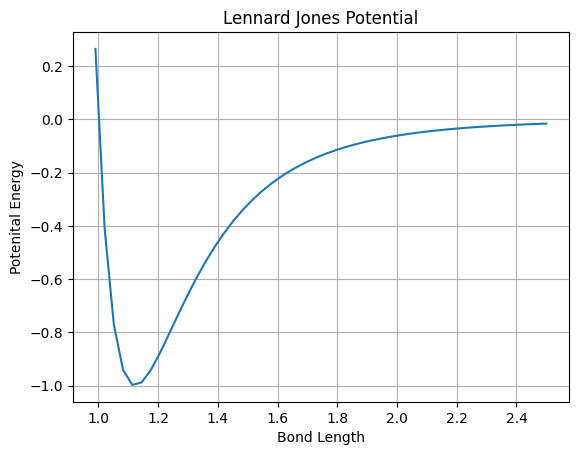

In [96]:
def r_mag(atom_1, atom_2):
    diff_vector =  atom_1 - atom_2
    r = np.linalg.norm(diff_vector)
    return r

def Vlj_3d(r_mag, epsilon=1.0, sigma=1.0):
    potential = 4*epsilon*((sigma/r_mag)**12 - (sigma/r_mag)**6)
    return potential
    
A = np.array([1.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
atoms = [A, B]
r = r_mag(atoms[0], atoms[1])    
# This here is for a single point, but lets sketch out this potential for mulitple radii
radii = np.linspace(0.99,2.5)
V_E = Vlj_3d(radii)
plt.plot(radii, V_E);plt.xlabel("Bond Length");plt.ylabel("Potenital Energy");plt.title("Lennard Jones Potential");plt.grid()
plt.show()

#### b)

![Alt text](Pset02.png)

#### c)

In [97]:
def Flj_3d(atom_index, atoms, epsilon=1.0, sigma=1.0):
    force = np.zeros((3,1))
    for i in range(len(atoms)):
        if i != atom_index:
            force_part = np.zeros((3,1))
            r = r_mag(atoms[atom_index], atoms[i])
            for j in range(3):
                force_part[j] = ((atoms[atom_index][j] - atoms[i][j]) * ((24*(sigma**6)*epsilon) / (r**8))
                *(1-(2*((sigma/r)**6))))
            force += force_part
    force = -force
        
    return force #Our force is 3 dimensional
    
A = np.array([2.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
atoms = [A,B]
F = Flj_3d(0, atoms)

#### d)
The atoms will oscillate. The sign of the force between them at this point marked is negative. This is consistent with my first statement because a negative force will act to bring the atoms closer together.

### A2: Dynamics
#### a)

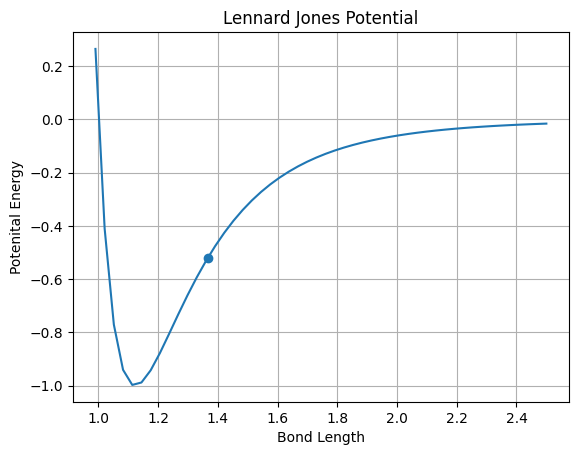

In [122]:
def Flj_3d(atom_index, atoms, epsilon=1.0, sigma=1.0):
    force = np.zeros((3,1))
    for i in range(len(atoms)):
        if i != atom_index:
            force_part = np.zeros((3,1))
            r = r_mag(atoms[atom_index], atoms[i])
            for j in range(3):
                force_part[j] = ((atoms[atom_index][j] - atoms[i][j]) * ((24*(sigma**6)*epsilon) / (r**8))
                *(1-(2*((sigma/r)**6))))
            force += force_part
    force = -force
        
    return force #Our force is 3 dimensional
    
A = np.array([2.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
atoms = [A,B]
F = Flj_3d(0, atoms)
def Verlet_Algorithm(atoms, vel_atoms, m_atoms, end_t, h):
    t = [0]
    n = len(atoms)
    position = []
    velocity = []
    for i in range(n):
        position.append([[j] for j in atoms[i]])
    # print(position)
    # x = [[atoms[0][0]], [atoms[1][0]]]#list that keeps track of all the positions of every atoms over the length of time
    # y = [[atoms[0][1]], [atoms[1][1]]]
    # z = [[atoms[0][2]], [atoms[1][2]]]
    for i in range(n):
        velocity.append([[j] for j in vel_atoms[i]])
    # print(velocity)
    # x_vel = [[vel_atoms[0][0]], [vel_atoms[1][0]]]
    # y_vel = [[vel_atoms[0][1]], [vel_atoms[1][1]]]
    # z_vel = [[vel_atoms[0][2]], [vel_atoms[1][2]]]
    while t[-1] < end_t:    
        # Before we begin, lets find the force at the positions we 
        # curently are and store them for later use
        F_k_0 = np.zeros((len(atoms), 3))
        atoms_new = np.zeros((len(atoms), 3))
        # Step 1: Calculate the new positions
        # print("yep")
        for i in range(len(atoms)):
            F = Flj_3d(i, atoms)
            #print(F) # GOOD
            for j in range(3):
                F_k_0[i][j] = F[j]
                atoms_new[i][j] = atoms[i][j] + (h*vel_atoms[i][j]) + (((h**2)*F[j])/(2*m_atoms[i]))
                # print(atoms_new[i][j])
            position[i][0].append(atoms_new[i][0])
            position[i][1].append(atoms_new[i][1])
            position[i][2].append(atoms_new[i][2])
        # print("done")
        for i in range(len(atoms)): #now we modify 
            for j in range(3):
                atoms[i][j] = atoms_new[i][j]
        # if t[-1] == 0:
        #     print(atoms)
            # print(F_k_0)
        # Step 2: Evaluate the Forces at these new positions
        F_k_1 = np.zeros((len(atoms), 3))
        vel_new = np.zeros((len(atoms), 3))
        # Step 3: Calculate the new velocities 
        for i in range(len(atoms)):
            F = Flj_3d(i, atoms)
            for j in range(3):
                F_k_1[i][j] = F[j]
                # if t[-1] == 0:
                #     print(F_k_1[i][j])
                vel_new[i][j] = vel_atoms[i][j] + ((h/(2*m_atoms[i]))*(F_k_0[i][j]+F_k_1[i][j]))
            # if t[-1] == 0:
            #     print(vel_new)
            velocity[i][0].append(vel_new[i][0])
            velocity[i][1].append(vel_new[i][1])
            velocity[i][2].append(vel_new[i][2])
            # if t[-1] == 0:
            #     print(x_vel[i])
        # if t[-1] == 0:
        #         print(x_vel)
        for i in range(len(atoms)): #now we modify 
            for j in range(3):
                vel_atoms[i][j] = vel_new[i][j]
            # if t[-1] == 0:
            # print(vel_atoms)
        t.append(t[-1]+h)
        
    return t, np.array(position), np.array(velocity)
A = np.array([2.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
A_vel = np.array([-0.1, 0.0, 0.0])
B_vel = np.array([0.0, 0.0, 0.0])
atoms = [A,B]
vel_atoms = [A_vel, B_vel]
m_atoms = [1.0, 1.0]
end_t = 20
t, pos, vel = Verlet_Algorithm(atoms, vel_atoms, m_atoms, end_t, 0.02)
r_x = np.sqrt((pos[1][0] - pos[0][0])**2)
V = Vlj_3d(r_x)
plt.scatter(r_x[-1], V[-1])
plt.plot(radii, V_E);plt.xlabel("Bond Length");plt.ylabel("Potenital Energy");plt.title("Lennard Jones Potential");plt.grid()
plt.show()

#### b)

The curve is sharper for the small radius because the absolute value of the potential's derivative is greater on the left side of the potential than on the right.

## A3: Conservation of Energy
#### a)

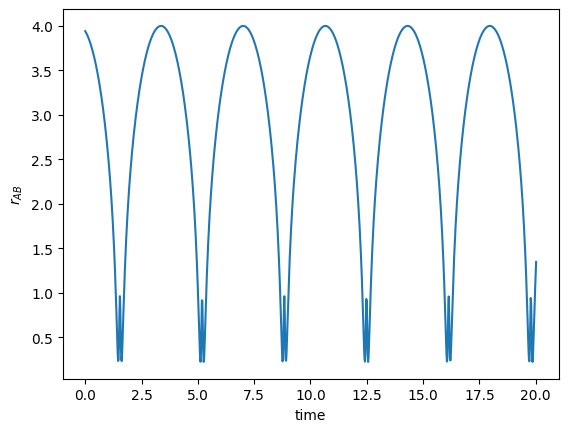

3.9384765625
1.3478282052083652


In [173]:
A = np.array([2.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
A_vel = np.array([-0.1, 0.0, 0.0])
B_vel = np.array([0.0, 0.0, 0.0])
atoms = [A,B]
vel_atoms = [A_vel, B_vel]
m_atoms = [1.0, 1.0]
end_t = 20
t, pos, vel = Verlet_Algorithm(atoms, vel_atoms, m_atoms, end_t, 0.02)
r_x = np.sqrt((pos[1][0] - pos[0][0])**2)
V = Vlj_3d(r_x)
energy = (0.5*2*(r_x**2)) + V
plt.plot(t, energy);plt.xlabel("time");plt.ylabel("$r_{AB}$");plt.show()
print(energy[0])
print(energy[-1])

The error is the largest when the atoms are close together (small $r_{AB}$). 
The error term is highest at the left side of the potential well.

#### b)

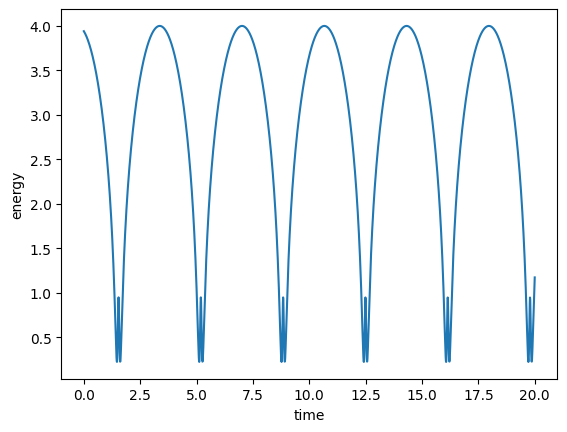

3.9384765625
1.173699624853004


In [170]:
A = np.array([2.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
A_vel = np.array([-0.1, 0.0, 0.0])
B_vel = np.array([0.0, 0.0, 0.0])
atoms = [A,B]
vel_atoms = [A_vel, B_vel]
m_atoms = [1.0, 1.0]
end_t = 20
t, pos, vel = Verlet_Algorithm(atoms, vel_atoms, m_atoms, end_t, 0.01)
r_x = np.sqrt((pos[1][0] - pos[0][0])**2)
V = Vlj_3d(r_x)
energy = (0.5*2*(r_x**2)) + V
plt.plot(t, energy);plt.xlabel("time");plt.ylabel("energy");plt.show()
print(energy[0])
print(energy[-1])

As the step size decreases, so does the error in our energy. We cam say that our algorithm is "recovering accuracy" faster.
#### c)

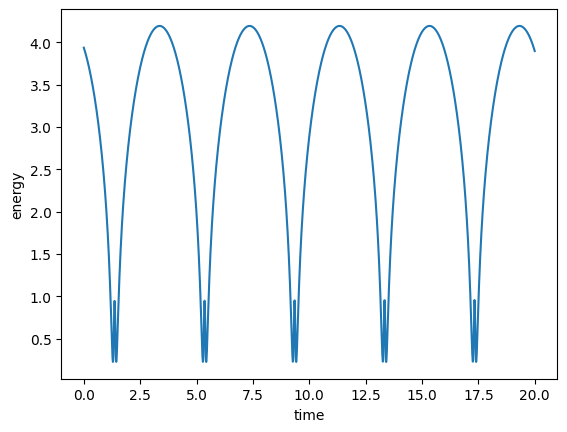

3.9384765625
3.8989557801718973


In [169]:
A = np.array([2.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
A_vel = np.array([-0.2, 0.0, 0.0])
B_vel = np.array([0.0, 0.0, 0.0])
atoms = [A,B]
vel_atoms = [A_vel, B_vel]
m_atoms = [1.0, 1.0]
end_t = 20
t, pos, vel = Verlet_Algorithm(atoms, vel_atoms, m_atoms, end_t, 0.01)
r_x = np.sqrt((pos[1][0] - pos[0][0])**2)
V = Vlj_3d(r_x)
energy = (0.5*2*(r_x**2)) + V
plt.plot(t, energy);plt.xlabel("time");plt.ylabel("energy");plt.show()
print(energy[0])
print(energy[-1])

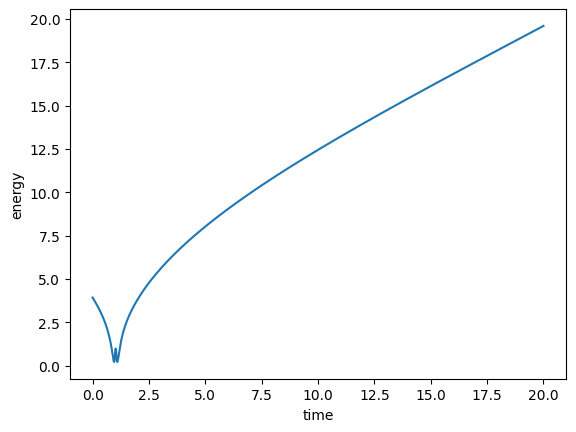

3.9384765625
19.595437388722722


In [168]:
A = np.array([2.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
A_vel = np.array([-0.5, 0.0, 0.0])
B_vel = np.array([0.0, 0.0, 0.0])
atoms = [A,B]
vel_atoms = [A_vel, B_vel]
m_atoms = [1.0, 1.0]
end_t = 20
t, pos, vel = Verlet_Algorithm(atoms, vel_atoms, m_atoms, end_t, 0.01)
r_x = np.sqrt((pos[1][0] - pos[0][0])**2)
V = Vlj_3d(r_x)
energy = (0.5*2*(r_x**2)) + V
plt.plot(t, energy);plt.xlabel("time");plt.ylabel("energy");plt.show()
print(energy[0])
print(energy[-1])

### A4: Bonus

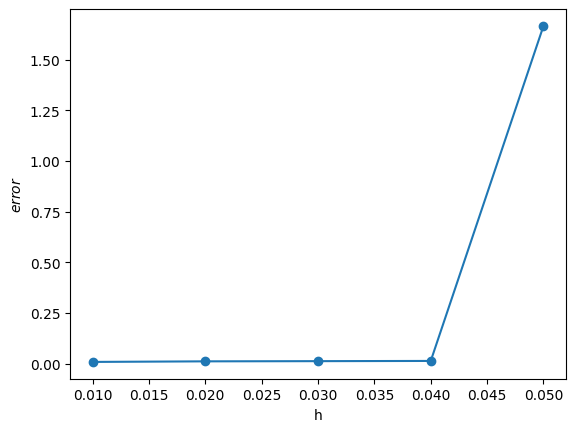

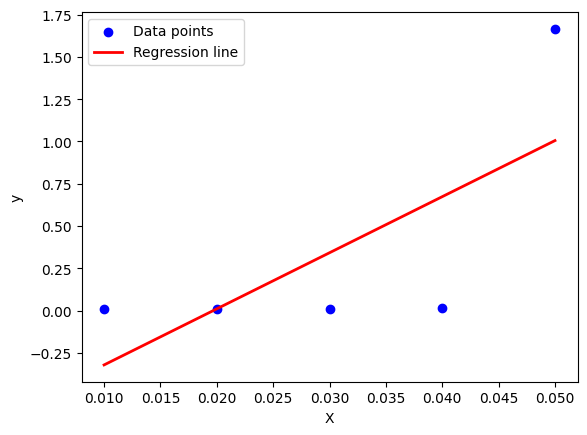

In [167]:
def rmse(energy):
    for i in range(len(energy)):
        diff_sq = (energy[0]-energy[i])**2
    return np.sqrt(diff_sq / len(energy))
r0 = 2 
v0 = -0.5
h = 0.01
m = 1
end_time = 10
error = []
h_list = [round(0.01*x+0.01,2) for x in range(5)]
for h in h_list: # 10 rms energies errors will be calculated from different h values.
    A = np.array([2.0, 0.0, 0.0]) 
    B = np.array([0.0, 0.0, 0.0])
    A_vel = np.array([-0.1, 0.0, 0.0])
    B_vel = np.array([0.0, 0.0, 0.0])
    atoms = [A,B]
    vel_atoms = [A_vel, B_vel]
    m_atoms = [1.0, 1.0]
    end_t = 10
    t, pos, vel = Verlet_Algorithm(atoms, vel_atoms, m_atoms, end_t, h)

    r_x = np.sqrt((pos[1][0] - pos[0][0])**2)
    V = Vlj_3d(r_x)
    energy = (0.5*2*(r_x**2)) + V
    error.append(rmse(energy))
    
plt.plot(h_list, error);plt.scatter(h_list, error);plt.xlabel("h");plt.ylabel("$error$")
plt.show()
# linear regression model
H = np.array(h_list)
E = np.array(error)
H = H.reshape(-1, 1)
model = LinearRegression()
model.fit(H, E)
# Create a range of values for plotting the regression line
H_plot = np.linspace(H.min(), H.max(), 100).reshape(-1, 1)

# Predict y values for the plotting range
E_plot = model.predict(H_plot)

# Plot the original data points
plt.scatter(H, E, color='blue', label='Data points')
# Plot the regression line
plt.plot(H_plot, E_plot, color='red', linewidth=2, label='Regression line')
# Label the axes
plt.xlabel('X');plt.ylabel('y');plt.legend();
plt.show()

#### When  you increase the energy of the system, the bond breaks. This is why we see the bond length increase linearly.
## Part B: Triatomic reaction dynamics with Lennard-Jones potentials
### B1: The Lennard-Jones potential
#### a)

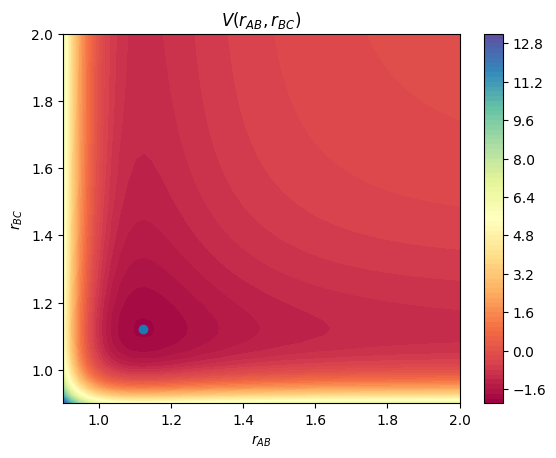

In [176]:
r_AB = np.linspace(0.9,2.0)
r_BC = np.linspace(0.9,2.0)

def V(r, epsilon=1, sigma=1):
    potential = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
    return potential


rAB, rBC,= np.meshgrid(r_AB, r_BC)
    
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)

plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
r_min = 2**(1/6)
plt.scatter(r_min,r_min)

plt.title('$V(r_{AB}, r_{BC})$')
plt.xlabel('$r_{AB}$')
plt.ylabel('$r_{BC}$')
plt.show()

##### The configuration of the atoms that gives the minimum potential would be when r_AB = r_BC = 2**(1/6).
#### b)

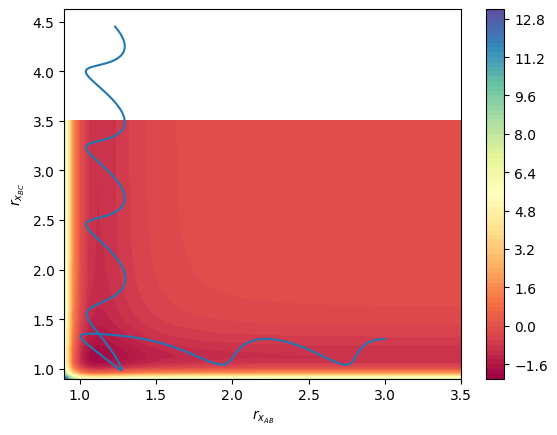

In [188]:
A = np.array([-3.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
C = np.array([1.3, 0.0, 0.0])
A_vel = np.array([1.0, 0.0, 0.0])
B_vel = np.array([0.0, 0.0, 0.0])
C_vel = np.array([0.0, 0.0, 0.0])
atoms = [A,B,C]
vel_atoms = [A_vel, B_vel, C_vel]
m_atoms = [1.0, 1.0, 1.0]
end_t = 5
t, pos, vel = Verlet_Algorithm(atoms, vel_atoms, m_atoms, end_t, 0.02)
r_AB_x = np.sqrt((pos[1][0] - pos[0][0])**2)
r_BC_x = np.sqrt((pos[2][0] - pos[1][0])**2)

plt.plot(r_AB_x, r_BC_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

##### These starting conditions are preparation for simulating what happens when particle with an intial velocity interacts with a pair of bonded particles in a 1-dimensional plane.

#### c)

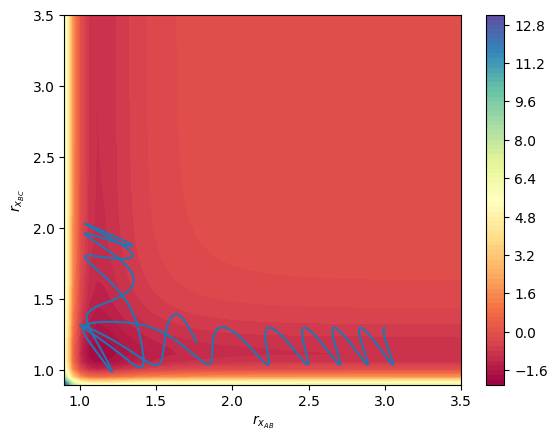

In [186]:
A = np.array([-3.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
C = np.array([1.3, 0.0, 0.0])
A_vel = np.array([0.2, 0.0, 0.0])
B_vel = np.array([0.0, 0.0, 0.0])
C_vel = np.array([0.0, 0.0, 0.0])
atoms = [A,B,C]
vel_atoms = [A_vel, B_vel, C_vel]
m_atoms = [1.0, 1.0, 1.0]
end_t = 10
t, pos, vel = Verlet_Algorithm(atoms, vel_atoms, m_atoms, end_t, 0.02)
r_AB_x = np.sqrt((pos[1][0] - pos[0][0])**2)
r_BC_x = np.sqrt((pos[2][0] - pos[1][0])**2)

plt.plot(r_AB_x, r_BC_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

#### d)

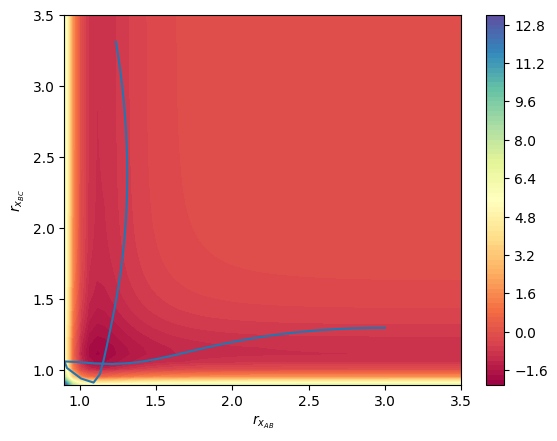

In [183]:
A = np.array([-3.0, 0.0, 0.0]) 
B = np.array([0.0, 0.0, 0.0])
C = np.array([1.3, 0.0, 0.0])
A_vel = np.array([5.0, 0.0, 0.0])
B_vel = np.array([0.0, 0.0, 0.0])
C_vel = np.array([0.0, 0.0, 0.0])
atoms = [A,B,C]
vel_atoms = [A_vel, B_vel, C_vel]
m_atoms = [1.0, 1.0, 1.0]
end_t = 1
t, pos, vel = Verlet_Algorithm(atoms, vel_atoms, m_atoms, end_t, 0.02)
r_AB_x = np.sqrt((pos[1][0] - pos[0][0])**2)
r_BC_x = np.sqrt((pos[2][0] - pos[1][0])**2)

plt.plot(r_AB_x, r_BC_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

## Part C: Triatomic reaction dynamics with LEPS potential
### C1: Dynamics on the LEPS potential
#### a)

[-4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0]


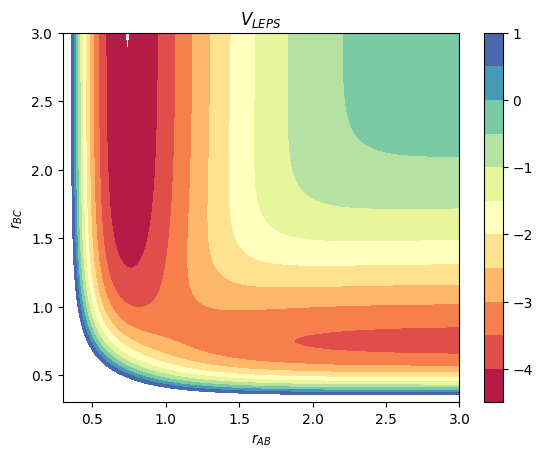

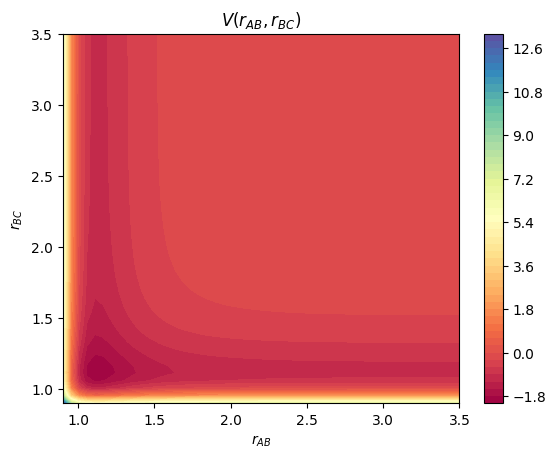

In [96]:
def Q(r, d, r_0=0.742, alpha=1.942):
    return (d/2) * ((1.5 * np.exp(-2*alpha*(r-r_0))) - (np.exp(-alpha*(r-r_0))))

def J(r, d, r_0=0.742, alpha=1.942):
    return (d/4) * (np.exp(-2*alpha*(r-r_0)) - (6 * np.exp(-alpha*(r-r_0))))


# def V_LEPS(r_AB, r_BC, a, b, c, d_AB, d_BC, d_AC):
#     r_AC = np.abs(r_AB) + np.abs(r_BC)
#     return ((Q(r_AB, d_AB)/(1+a)) + (Q(r_BC, d_BC)/(1+b)) + (Q(r_AC, d_AC)/(1+c)) - np.sqrt( ((J(r_AB, d_AB)**2)/((1+a)**2))
#             + ((J(r_AB, d_AB)**2)/((1+a)**2)) + ((J(r_BC, d_BC)**2)/((1+b)**2)) + ((J(r_BC, d_BC)**2)/((1+b)**2)) +  
#             - ((J(r_AB, d_AB)*J(r_BC, d_BC)) / ((1+a)*(1+b))) - ((J(r_BC, d_BC)*J(r_AC, d_AC)) / ((1+b)*(1+c))) 
#             - ((J(r_AB, d_AB)*J(r_AC, d_AC)) / ((1+a)*(1+c))) ) ) 

def V_LEPS(r_AB, r_BC, a, b, c, d_AB, d_BC, d_AC):
    r_AC = np.abs(r_AB) + np.abs(r_BC)  # Simplified geometric relation
    return ((Q(r_AB, d_AB)/(1+a)) + (Q(r_BC, d_BC)/(1+b)) + (Q(r_AC, d_AC)/(1+c)) - np.sqrt(
            ((J(r_AB, d_AB)**2)/((1+a)**2)) + ((J(r_BC, d_BC)**2)/((1+b)**2)) + ((J(r_AC, d_AC)**2)/((1+c)**2))
            - ((J(r_AB, d_AB)*J(r_BC, d_BC)) / ((1+a)*(1+b))) - ((J(r_BC, d_BC)*J(r_AC, d_AC)) / ((1+b)*(1+c))) 
            - ((J(r_AB, d_AB)*J(r_AC, d_AC)) / ((1+a)*(1+c))) ) ) 

a = 0.05
b = 0.30
c = 0.05
d_AB = 4.746
d_BC = 4.746
d_AC = 3.445
r_AB = np.linspace(0.3, 3.0, 100)
r_BC = np.linspace(0.3, 3.0, 100)
R_AB, R_BC = np.meshgrid(r_AB, r_BC)

V = V_LEPS(R_AB, R_BC, a, b, c, d_AB, d_BC, d_AC)

V_levels = [(x*0.5)-4.5 for x in range(12)]
# V_levels = [(x*0.5)-8.0 for x in range(20)]
print(V_levels)

plt.contourf(R_AB, R_BC, V, levels=V_levels, cmap="Spectral")
# plt.contourf(R_AB, R_BC, V, cmap="coolwarm")
plt.colorbar() # Show color scale
plt.title('$V_{LEPS}$')
plt.xlabel('$r_{AB}$')
plt.ylabel('$r_{BC}$')
plt.show()

plt.contourf(rAB, rBC, V_AB_BC, levels=50, cmap='Spectral')
plt.colorbar()
r_min = 2**(1/6)

plt.title('$V(r_{AB}, r_{BC})$')
plt.xlabel('$r_{AB}$')
plt.ylabel('$r_{BC}$')
plt.show()

The LEPS potential has more minimum points than Lennard-Jones.

#### b)

In [185]:
r, r_AB, r_BC, d, a, r_0 = sp.symbols("r r_{AB} r_{BC} d alpha r_0") 
d_AB, d_BC, d_AC = sp.symbols("d_AB d_BC d_AC")
a_c, b, c = sp.symbols("a b c")

r_0=0.742 
a=1.942
a_c = 0.05
b = 0.30
c = 0.05
d_AB = 4.746
d_BC = 4.746
d_AC = 3.445

r_AC = r_AB + r_BC

#Q Function
Q = (d/2) * ((1.5 * sp.exp(-2*a*(r-r_0))) - (sp.exp(-a*(r-r_0))))
Q_d = sp.simplify(sp.diff(Q, r))

#Q Dervatives
Q_AB = Q.subs([(r, r_AB), (d, d_AB)])
Q_AB_d = sp.simplify(sp.diff(Q_AB, r_AB))

Q_AC = Q_d.subs([(r, r_AC), (d, d_AC)])
Q_AC_d = sp.simplify(sp.diff(Q_AC, r_AB))

#J Function
J = ((d/4) * (sp.exp(-2*a*(r-r_0)) - (6 * sp.exp(-a*(r-r_0)))))
J_2_dev = sp.simplify(sp.diff(J**2, r))

#J^2 Derivatives
J_AB = J.subs([(r,r_AB),(d, d_AB)])
J_AB_2_d = sp.simplify(sp.diff(J_AB**2, r_AB))

J_BC = J.subs([(r,r_BC),(d, d_BC)])
J_BC_2_d = sp.simplify(sp.diff(J_BC**2, r_AB))

J_AC = J.subs([(r,r_AC),(d, d_AC)])
J_AC_2_d = sp.simplify(sp.diff(J_AC**2, r_AB))

#J*J_other derivatives
J_AB_BC = J_AB*J_BC
J_AB_BC_d = sp.simplify(sp.diff(J_AB_BC, r_AB))

J_BC_AC = J_BC*J_AC
J_BC_AC_d = sp.simplify(sp.diff(J_BC_AC, r_AB))

J_AB_AC = J_AB*J_AC
J_AB_AC_d = sp.simplify(sp.diff(J_AB_AC, r_AB))

#derivative of LEPS Potential 
d_rAB_V = ( ((1/(1+a_c))*Q_AB_d) + ((1/(1+c))*Q_AC_d) - 
        ( ((1/(1+a_c)**2)*J_AB_2_d) + ((1/(1+c)**2)*J_AC_2_d) 
            - ((1/((1+a_c)*(1+b)))*J_AB_BC_d) - ((1/((1+b)*(1+c)))*J_BC_AC_d) 
            - ((1/((1+a_c)*(1+c)))*J_AB_AC_d)) )
print(d_rAB_V)

-0.732600732600732*(82.2531220782092*exp(1.942*r_{AB}) - 58.4078112979045*exp(3.884*r_{AB}))*(21.1774258697758*exp(1.942*r_{BC}) - 30.0761129237407*exp(3.884*r_{BC}))*exp(-5.826*r_{AB} - 5.826*r_{BC}) - 0.732600732600732*(21.1774258697758*exp(1.942*r_{BC}) - 30.0761129237407*exp(3.884*r_{BC}))*(59.7054373281565*exp(1.942*r_{AB} + 1.942*r_{BC}) - 42.3967361823179*exp(3.884*r_{AB} + 3.884*r_{BC}))*exp(-5.826*r_{AB} - 11.652*r_{BC}) + 1664.9452006354*exp(-7.768*r_{AB} - 7.768*r_{BC}) - 2293.7097016591*exp(-7.768*r_{AB} - 3.884*r_{BC}) - 3546.82482475009*exp(-5.826*r_{AB} - 5.826*r_{BC}) + 2443.13942209926*exp(-5.826*r_{AB} - 3.884*r_{BC}) + 2443.13942209926*exp(-5.826*r_{AB} - 1.942*r_{BC}) + 1679.0631150653*exp(-3.884*r_{AB} - 3.884*r_{BC}) - 2313.15922905658*exp(-3.884*r_{AB} - 1.942*r_{BC}) + 662.559767378742*exp(-3.884*r_{AB} - 3.884*r_{BC}) - 26.1379243384322*exp(-1.942*r_{AB} - 1.942*r_{BC}) + 3159.92634080525*exp(-7.768*r_{AB}) - 6731.57602164476*exp(-5.826*r_{AB}) + 2951.712038006

In [202]:
#Q Dervatives
Q_BC = Q.subs([(r, r_BC), (d, d_BC)])
Q_BC_d = sp.simplify(sp.diff(Q_BC, r_BC))

Q_AC = Q_d.subs([(r, r_AC), (d, d_AC)])
Q_AC_d = sp.simplify(sp.diff(Q_AC, r_BC))

#J^2 Derivatives
J_AB = J.subs([(r,r_AB),(d, d_AB)])
J_AB_2_d = sp.simplify(sp.diff(J_AB**2, r_BC))

J_BC = J.subs([(r,r_BC),(d, d_BC)])
J_BC_2_d = sp.simplify(sp.diff(J_BC**2, r_BC))

J_AC = J.subs([(r,r_AC),(d, d_AC)])
J_AC_2_d = sp.simplify(sp.diff(J_AC**2, r_BC))

#J*J_other derivatives
J_AB_BC = J_AB*J_BC
J_AB_BC_d = sp.simplify(sp.diff(J_AB_BC, r_BC))

J_BC_AC = J_BC*J_AC
J_BC_AC_d = sp.simplify(sp.diff(J_BC_AC, r_BC))

J_AB_AC = J_AB*J_AC
J_AB_AC_d = sp.simplify(sp.diff(J_AB_AC, r_BC))

#derivative of LEPS Potential 
d_rBC_V = ( ((1/(1+a_c))*Q_BC_d) + ((1/(1+c))*Q_AC_d) - 
         (((1/(1+a_c)**2)*J_BC_2_d) + ((1/(1+c)**2)*J_AC_2_d) 
            - ((1/((1+a_c)*(1+b)))*J_AB_BC_d) - ((1/((1+b)*(1+c)))*J_BC_AC_d) 
            - ((1/((1+a_c)*(1+c)))*J_AB_AC_d)) )
#d_rBC_V.subs([(a, )])
d_rBC_V
d_V = [d_rAB_V, d_rBC_V]

#### c)

In [208]:
def bond_lengths(pos):
    r = [[0 for _ in range(len(pos))] for _ in range(len(pos))]
    for i in range(len(pos)):
        for j in range(len(pos)):
            xij = pos[i][-1] - pos[j][-1]
            print(xij)
            r[i][j] = np.sqrt(xij**2)
    return r    

def force(particle_index, r, d_V, sigma=1.0, epsilon=1.0):
    #The force vector containing all 3D forces acting on a specified particle.
    d = d_V[particle_index].subs([(r_AB, r[0][1]), (r_BC, r[1][2]), (r_AC, r[0][2])])
    f = -d
    #print(f)
    return f

def multiple_atoms_Verlet(pos, vel, h, end_time, m, d_V):
    t = [0]
    while t[-1] < end_time:
        F = [[0 for _ in range(1)] for _ in range(len(pos))]
        F_new = [[0 for _ in range(1)] for _ in range(len(pos))]
        #Compute all of our r_ij b/c we need them for computing F
        
        r = bond_lengths(pos)
        for i in range(len(pos)-1):
            F[i] = force(i, r, d_V)
        
        # step 1: calculate    
        for i in range(len(pos)-1):
            pos[i].append(pos[i][-1] + (h*vel[i][-1]) + (((h**2)*F[i])/(2*m[i]))) # xi(k+1)
        
        # step 2: evaluate  
        # Because we have computed new positions for each particle, we must re-compute our new bond lengths.
        r = bond_lengths(pos)
        for i in range(len(pos)-1):
            F_new[i] = force(i, r, d_V)
            
        # step 3: calculate
        for i in range(len(pos)-1):
            vel[i].append(vel[i][-1] + ((h/(2*m[i])) * (F[i] + F_new[i])))
        t.append(t[-1] + h)
    return t, pos, vel


def Verlet_Algo_LEPS(r):
    return t, r, v

A = [-3.0]
B = [0.0]
C = [0.8]
A_v = [1.0]
B_v = [0.0]
C_v = [0.0]
pos = [A, B, C]
vel = [A_v, B_v, C_v]
h = 0.01
end_time = 5
m = [1,1,1]
d_V = [d_rAB_V, d_rBC_V]
multiple_atoms_Verlet(pos, vel, h, end_time, m, d_V)
# print(d_V)

0.0
-3.0
-3.8
3.0
0.0
-0.8
3.8
0.8
0.0
0


TypeError: loop of ufunc does not support argument 0 of type Zero which has no callable sqrt method